In [130]:
!pip install geopandas

In [131]:
!pip install descartes

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, Polygon
#import adjustText as aT

In [133]:
from google.colab import files
uploaded = files.upload()

In [134]:
!ls

CAMS_ZIPCODE_STREET_SPECIFIC.cpg  CAMS_ZIPCODE_STREET_SPECIFIC.shp
CAMS_ZIPCODE_STREET_SPECIFIC.dbf  CAMS_ZIPCODE_STREET_SPECIFIC.shp.xml
CAMS_ZIPCODE_STREET_SPECIFIC.prj  CAMS_ZIPCODE_STREET_SPECIFIC.shx
CAMS_ZIPCODE_STREET_SPECIFIC.sbn  income_clean.csv
CAMS_ZIPCODE_STREET_SPECIFIC.sbx  sample_data


In [0]:
# Loading the data files
polygon_file = 'CAMS_ZIPCODE_STREET_SPECIFIC.shp'
polygons = gpd.read_file(polygon_file)

In [136]:
polygons.head()

,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len,geometry
0,1,105,0,90001,0.0,8499,0.0,90001,9.562251e+07,55969.055693,"POLYGON ((6483980.349832192 1818555.587574929,..."
1,2,194,1,90004,0.0,8502,0.0,90004,8.419310e+07,61463.722654,"POLYGON ((6473729.180045858 1852848.640051693,..."
2,3,157,2,90006,0.0,8504,0.0,90006,5.370240e+07,45757.198149,"POLYGON ((6475532.039957196 1842897.639940605,..."
3,4,136,3,90007,0.0,8505,0.0,90007,7.434590e+07,72292.215301,"POLYGON ((6473057.97896044 1837118.392312765, ..."
4,5,122,4,90008,0.0,8506,0.0,90008,1.084177e+08,65040.212765,"POLYGON ((6450341.790140942 1829160.79011777, ..."


In [137]:
import pyproj

project_projection = pyproj.Proj("+init=EPSG:2229") # Input map projections, GIS
google_projection = pyproj.Proj("+init=EPSG:4326") # Output map projections, google

# Save Coordinates to a list
#longitude = df_test['LONGITUDE'].values
#latitude = df_test['LATITUDE'].values
longitude = 6483980.349832192 
latitude = 1818555.587574929

# Output mercator map projections where x=long and y=lat
y, x = pyproj.transform(project_projection, google_projection, longitude, latitude)
x, y

(33.98921307224975, -118.25627203275592)

##Convert GIS polygon to latitude/longitude:

In [0]:
def convert_polygon(gis_poly):
    """Takes a GIS polygon as input and converts the location points to latitude/
    longitude and returns a new Polygon object w/ corresponding lat/long points"""
    from pyproj import Proj, transform
    
    #extract the coordinates from the GIS polygon
    points = []
    for i,j in list(gis_poly.exterior.coords):
        coordinate = j, i
        points.append(coordinate)
        
    #convert the coordinates from GIS to latitude/longitude
    lat_long_points = []
    
    gis_projection = Proj("+init=EPSG:2229") 
    lat_long_projection = Proj("+init=EPSG:4326")

    for lat, lon in points:
        y, x = transform(gis_projection, lat_long_projection, lon, lat)
        lat_long_points.append((x,y))
        
    #instantiate and return new lat_long Polygon object
    return Polygon(lat_long_points)

In [139]:
# test the function on the first Polygon from row 1 of our polygons df:
subset = polygons.iloc[:1]
subset

,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len,geometry
0,1,105,0,90001,0.0,8499,0.0,90001,9.562251e+07,55969.055693,"POLYGON ((6483980.349832192 1818555.587574929,..."


In [140]:
subset['converted_polygon'] = subset['geometry'].apply(convert_polygon)
subset

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len,geometry,converted_polygon
0,1,105,0,90001,0.0,8499,0.0,90001,9.562251e+07,55969.055693,"POLYGON ((6483980.349832192 1818555.587574929,...",POLYGON ((33.98921307224975 -118.2562720327559...


In [141]:
list(subset['converted_polygon'][0].exterior.coords)

[(33.98921307224975, -118.25627203275592),
 (33.98914924615378, -118.2562719358888),
 (33.989146635969966, -118.25627205993845),
 (33.98914465706232, -118.25627208635007),
 (33.989032901799014, -118.2562721739632),
 (33.98891611688406, -118.25627227756789),
 (33.98880620603128, -118.25627072143088),
 (33.9887306398408, -118.25627081915772),
 (33.98872885399663, -118.25627078122339),
 (33.988727232440716, -118.25627064422223),
 (33.98872561185529, -118.25627047475568),
 (33.98872399141237, -118.25627023818829),
 (33.98872237020587, -118.25626993668175),
 (33.98872077798819, -118.25626956924502),
 (33.988719185080484, -118.25626910223646),
 (33.98871761928735, -118.25626860284258),
 (33.98871605453824, -118.25626803635059),
 (33.98871451704162, -118.25626737253697),
 (33.9887130075634, -118.25626667525844),
 (33.988711497323834, -118.25626591195862),
 (33.98871001517165, -118.25626508272576),
 (33.988708561106804, -118.2562641875599),
 (33.98870713422778, -118.2562632264583),
 (33.988705

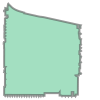

In [142]:
poly = subset.iloc[0]['converted_polygon']
poly

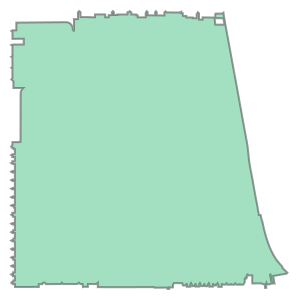

In [143]:
polygons.iloc[0]['geometry']

###UH-OH- looks like the image is mirrored (or flipped) both vertically and horizontally- lets test on row 2 data

In [144]:
subset2 = polygons.iloc[1:2]
subset2

,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len,geometry
1,2,194,1,90004,0.0,8502,0.0,90004,8.419310e+07,61463.722654,"POLYGON ((6473729.180045858 1852848.640051693,..."


In [145]:
subset2['converted_polygon'] = subset2['geometry'].apply(convert_polygon)
subset2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,OBJECTID_1,OBJECTID,FID_1,Name,SDE_STATE_,ORIG_FID,Distance,Zip_Num,Shape_area,Shape_len,geometry,converted_polygon
1,2,194,1,90004,0.0,8502,0.0,90004,8.419310e+07,61463.722654,"POLYGON ((6473729.180045858 1852848.640051693,...",POLYGON ((34.08336856317362 -118.2904153141149...


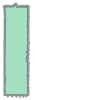

In [146]:
poly2 = subset2.iloc[0]['converted_polygon']
poly2

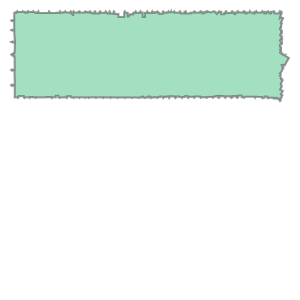

In [147]:
polygons.iloc[1]['geometry']

###yup, we have some issues

##Generate our grid points within each polygon:

In [0]:
def gen_points_inside_polygon(polygon, miles=1):
    #convert miles to degrees latitude/longitude 
    lat_increment = miles * 0.0145
    lon_increment = miles * 0.02 #this is specifically for L.A. (varies based on lat)
    
    #get the four corners of a grid of max and min lat/long values 
    min_lat, min_long, max_lat, max_long = polygon.bounds
    
    #iterate over the grid one unit at a time, append lats and lons to lists:
    longs, lats = [], []
    
    #Latitudes: start one half unit away from min_lat:
    lat = min_lat + (lat_increment / 2)
    while lat < max_lat:
        lats.append(lat)
        lat += lat_increment
    lats.append(max_lat)
    
    #repeat for longitude; conversion is diff, 1 mile = 0.0145 degrees
    #start one half unit above the min_lat
    lon = min_long + (lon_increment / 2)
    while lon < max_long:
        longs.append(lon)
        #increase .02 degrees (longitude conversion for Los Angeles)
        lon += lon_increment
    longs.append(max_long)
    

    #iterate thru all latitude and longitude points, instantiate shapely Point objects
    #and append them to a list:
    points = []
    for i in range(len(lats)):
        for j in range(len(longs)):
            points.append(Point(lats[i], longs[j]))
            
    #iterate over the points and throw out ones outside the polygon:
    points_inside_polygon = []
    for i in range(len(points)):
        if polygon.contains(points[i]):
            points_inside_polygon.append(points[i])
            
    #return the list of Shapely points which are bound inside the polygon        
    return points_inside_polygon

In [149]:
poly_points = gen_points_inside_polygon(poly)
poly_points

In [150]:
poly_points[0].xy

(array('d', [33.96678496947096]), array('d', [-118.25518357797722]))

In [152]:
poly2_points = gen_points_inside_polygon(poly2, miles=0.5)
poly2_points